In [1]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


poke_df = pd.read_csv('Desktop/datasets/Dimension_reduction_datasets/pokemon.csv')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
def pca_elbow_plot(df,n_components):
    """
    Ploting pca_elbow_plot to decide the number of components to keep.
    """
    # Pipeline a scaler and pca selecting n components
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('reducer', PCA(n_components=n_components))])

    # Fit the pipe to the data
    df_num = df.loc[:,df.dtypes == 'int64']
    pipe.fit(df_num)

    # Plot the explained variance ratio
    plt.plot(pipe.steps[1][1].explained_variance_ratio_)

    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.show()

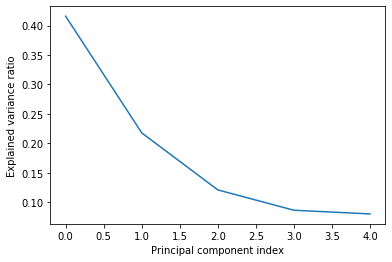

In [3]:
pca_elbow_plot(poke_df,5)

In [4]:
def pc_plot(df,hue):
    """
    Ploting 2 PC componanents and color the scattered points by a specified column
    """
    # Initializing Pipeline object
    pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

    # Fit the pipeline to df and transform the data
    df_num = df.loc[:,df.dtypes == 'int64']
    pc = pipe.fit_transform(df_num)

    # Initializing categorical df
    cat_df = pd.DataFrame({'PC 1' : pc[:, 0],'PC 2' : pc[:, 1],hue : df.loc[:,hue]})

    # Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
    sns.scatterplot(data=cat_df, 
                    x='PC 1', y='PC 2', hue=hue) 
    plt.show()

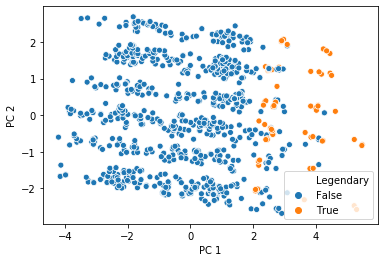

In [5]:
pc_plot(poke_df,'Legendary')

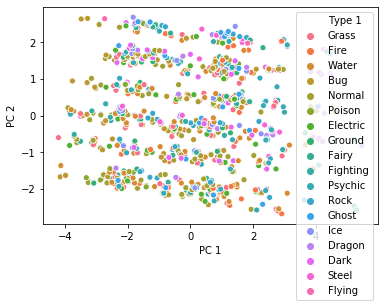

In [6]:
pc_plot(poke_df,'Type 1')